# <span style=color:blue> The Scientific Python Stack </span>
+ numpy: Submodules include
  + numpy.core: basic objects
  + numpy.lib: additional utilities
  + numpy.linalg: basic linear algebra
  + numpy.fft: discrete Fourier transform
  + numpy.random: random number generators
  + distutils: enhanced build and sistribution
  + testing: unit testing
  + f2py: automatic wrapping of the Fortran code
-----
#### Modules based on numpy
+ scipy: scientific computing
+ ipython: the interactive shell of Python
+ matplotlib: plotting and data visualization library
+ sympy: symbolic mathematics
+ scikit-learn: machine learning
+ statsmodels: statistics
+ pandas: data analysis
+ networkx: complex networks
+ Tensorflow, Keras: deep learning

-----
## <span style=color:blue> The numpy.ndarray Object </span>

### Create ndarrays from lists and tuples

    import numpy as np
    x = np.array(a, dtype=type)
    
Type      | Description
----------|--------
bool_     | boolean (True or False) stored as a byte
int_      | Default integer type (same as C long; normally either int64 or int32)
intc      | Identical to C int (normally int32 or int64)
intp      | Integer used for indexing (same as C ssize_t; normally either int32 or int64)
int8      | Byte [-128,127]
int16     | Integer [-32768,32767]
int32     | Integer [-2147483648, 2147483647]
int64     | Integer [-9223372036854775808, 9223372036854775807]
uint8     | Unsigned integer [0, 255]
uint16    | Unsigned integer [0, 65535]
uint32    | Unsigned integer [0, 4294967295]
uint64    | Unsigned integer [0, 18446744073709551615]
float_    | Shorthand for float64
float16   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
float32   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
float64   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa
complex_  | Shorthand for complex128
complex64 | Complex number, represented by two 32-bit floats (real and imaginary components)
complex128| Complex number, represented by two 64-bit floats (real and imaginary components)

In [1]:
import numpy as np

x = np.array([[0,1,2,3,4,5,6,7],[10,11,12,13,14,15,16,17],[20,21,22,23,24,25,26,27],[30,31,32,33,34,35,36,37]],dtype=np.float)
print(x)
print(x.ndim) # the dimension of x is 2
print(x.size) # the total number of elements of x
print(x.shape)# the shape of x (2,4)=> 2 rows and 4 columns
print(x.flags)

+ x.flags
  + C_CONTIGUOUS: True  (C-style array (row-major))
  + F_CONTIGUOUS: False (Fortran/Matlab-style array (column-major))
  + OWNDATA: True
  + WRITEABLE: True
  + ALIGNED: True
  + UPDATEFCOPY: False
+ np.asfortranarray: convert a C array to a Fortran array

In [34]:
import numpy as np
x = np.array([np.arange(-100,101,1) for x in range(200)])
f = np.asfortranarray(x) 
print(f.flags)
%timeit np.sum(x[0,:]) # a row sum
%timeit np.sum(f[0,:]) # a row sum
%timeit np.sum(x[:,0]) # a column sum
%timeit np.sum(f[:,0]) # a column sum

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
1.73 µs ± 13.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.88 µs ± 17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.84 µs ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.71 µs ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


-----
## <span style=color:blue>Create ndarrays</span>
+ x= np.ndarray((dim0,dim1,…,dimn),dtype=np.float)
+ x=np.zeros((dim0,dim1,…,dimn),dtype=np.float)
+ x=np.ones((dim0,dim1,…,dimn))
+ x=np.eye(dim0,dim1)
+ x=np.empty((dim0,dim1,…,dimn),dtype=object)
+ x=np.random.random((dim0,dim1,…,dimn)) # np.random.rand(dim0,dim1,…,dimn) 
+ x=np.random,randint(LOW,HIGH,size=SIZE)
+ x=np.diag([3,4],k=0) # 1-D=>2-D, 2-D=>1-D (the main diagonal)
+ x=np.arange(5) #[0,1,2,3,4]

### Assign a specific value to every element of x
x[:] =v # <span style=color:red> Note that x = v assigns v to x </span>

-----
## <span style=color:blue>ndarray Indexing and Slicing</span>

<table border="0">
 <tr>
<!--    <td><b style="font-size:30px">Title</b></td>   -->
<!--    <td><b style="font-size:30px">Title 2</b></td> -->
 </tr>
 <tr>
<td>
    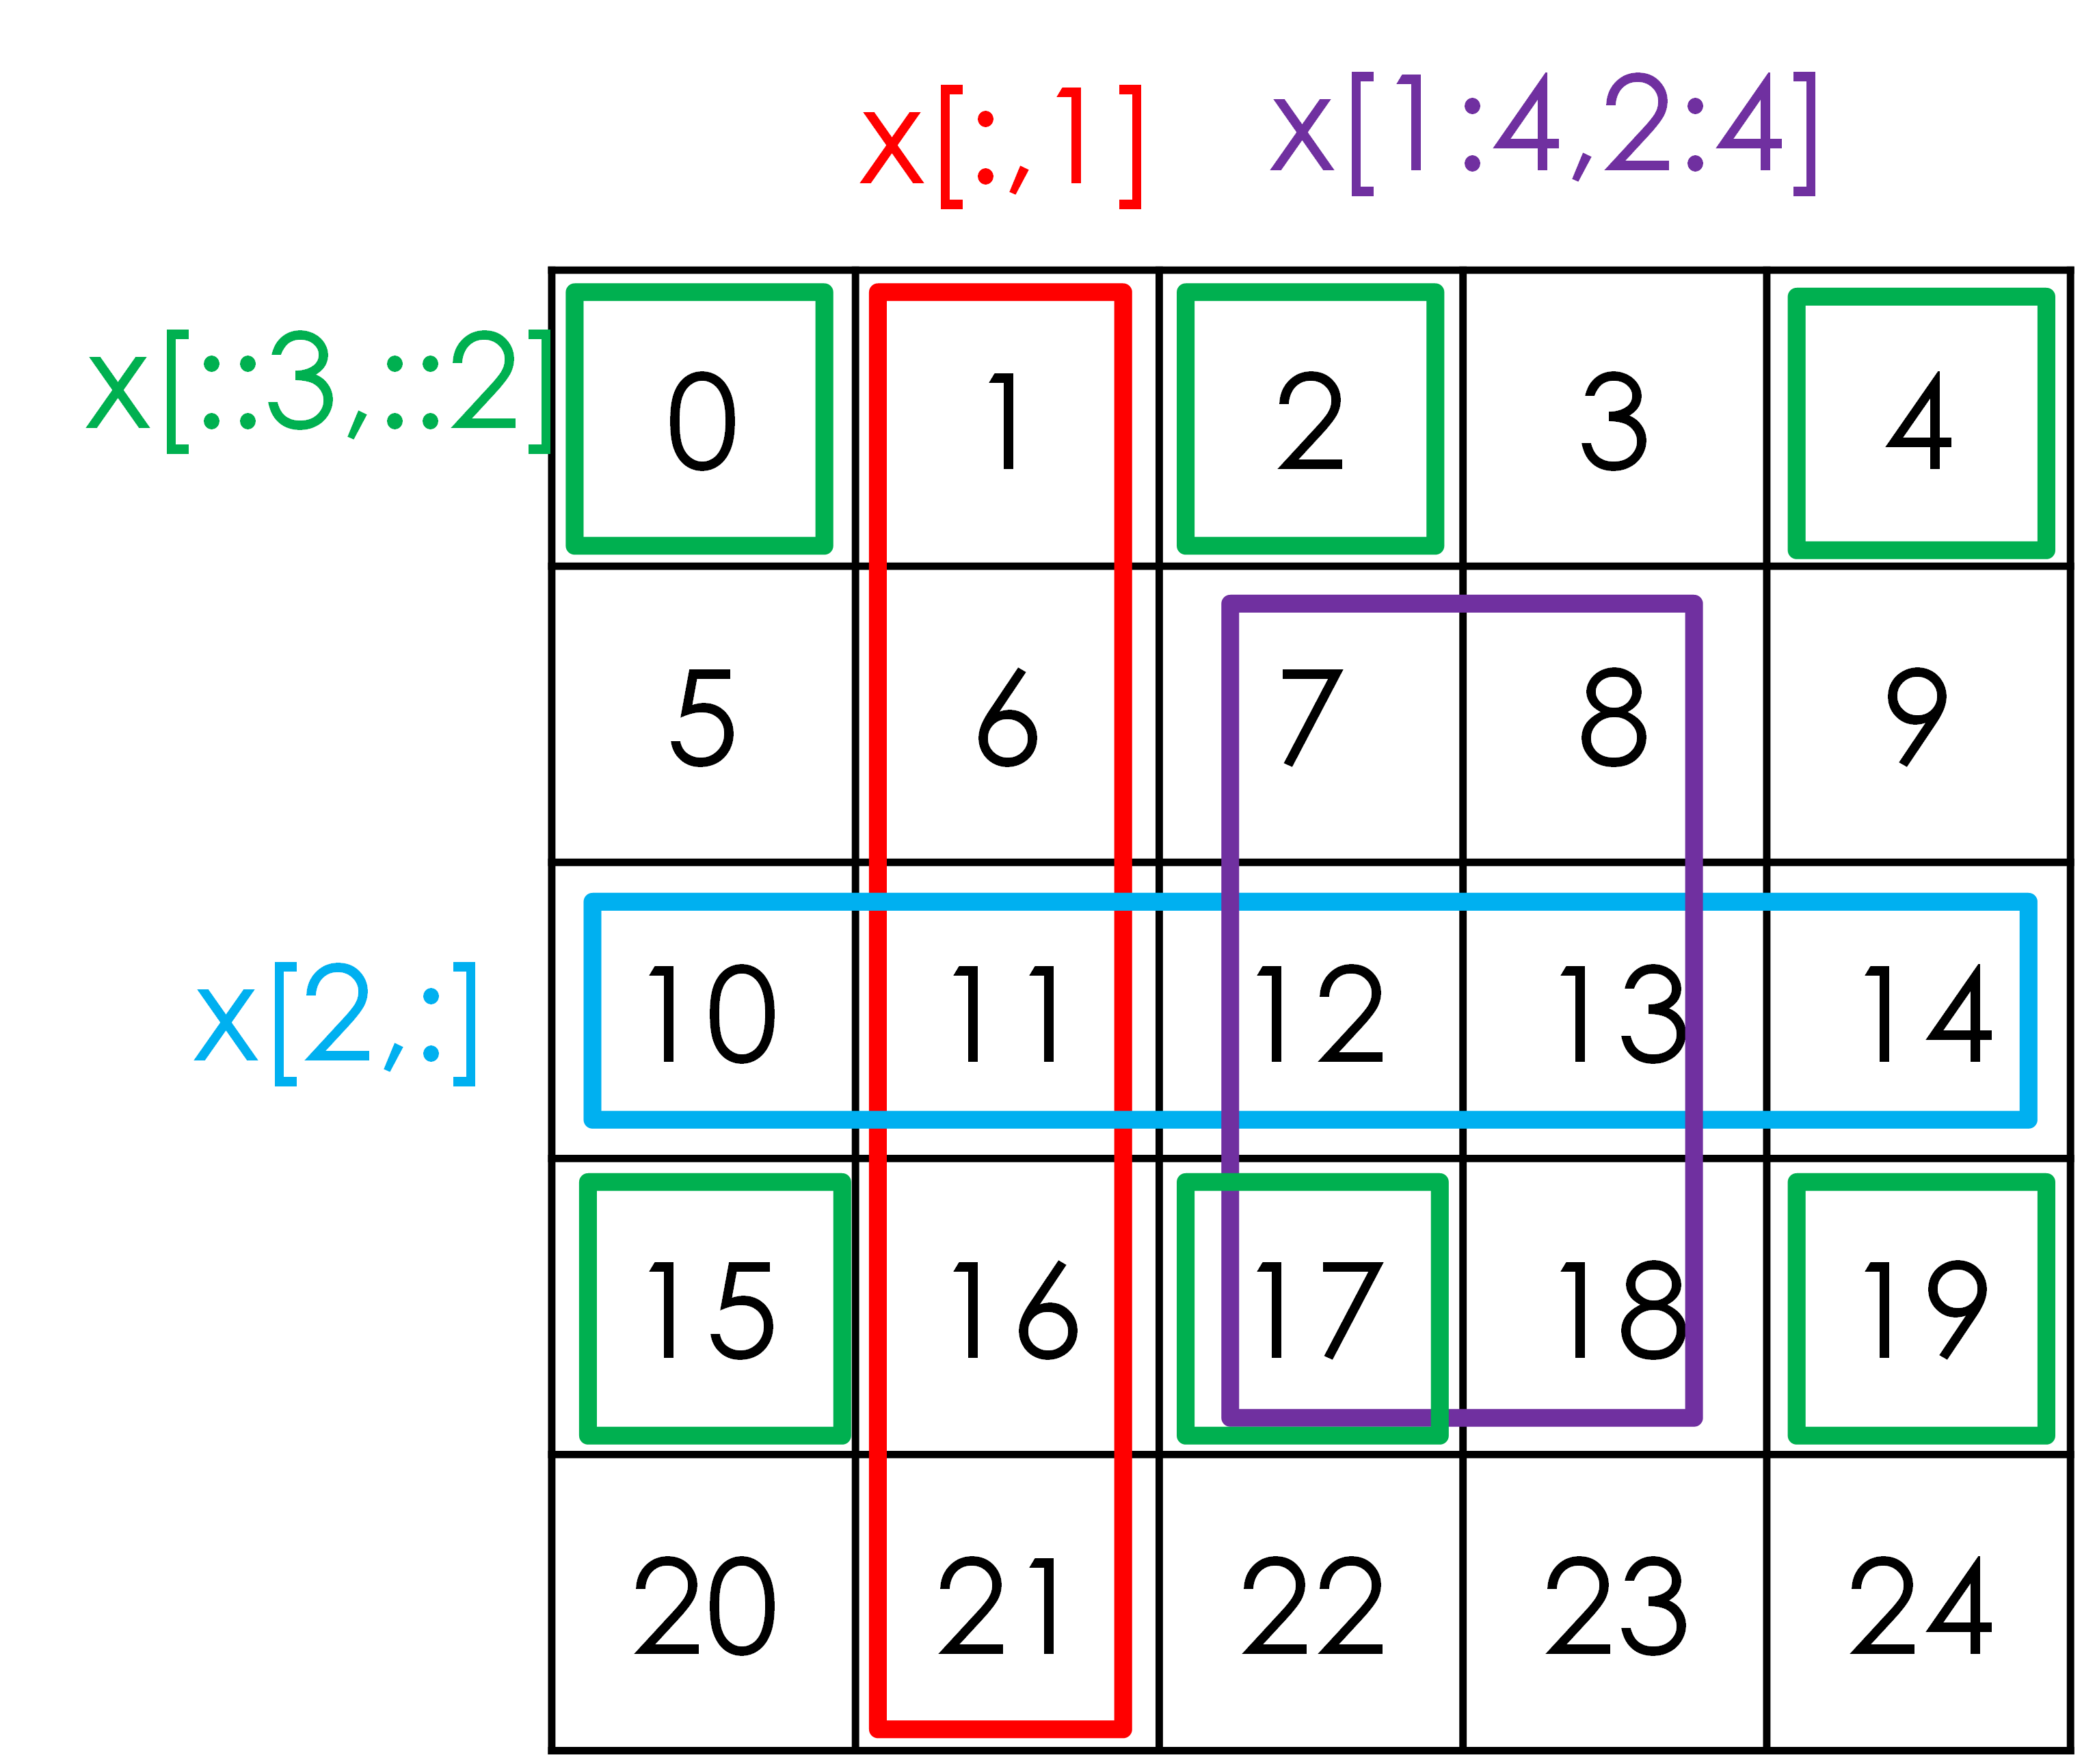
</td>
<td>
<ul >
    <li> <p align="left" style="font-size:16px"> x[:,i] # the ith column vector: x[:,0]</p> </li>
  <li > <p align="left" style="font-size:16px"> x[i,:] # the ist row vector: x[1,:]</p></li>
  <li> <p align="left" style="font-size:16px"> x[::-1] # rows in reverse order</p></li>
  <li> <p align="left" style="font-size:16px"> x[:,::-1] # columns in reverse order</p></li>
  <li> <p align="left" style="font-size:16px"> x[[1,0],:] # array([[5,6,7,8],[1,2,3,4]])</p></li>
  <li> <p align="left" style="font-size:16px"> x[[1,0],[2,3]] # array([7,3])</p></li>
</ul>        
</td>
</tr>
</table>


 

-----
## <span style=color:blue>Views and Copies of ndarrays</span>

### Create a View

    import numpy as np
    x = np.random.randint(0,10,(6,6))

    # create a view y, which is a reference to x[::2,::2]
    y = x[::2,::2]
    np.may_share_memory(x,y) # True if x and y share memory

### Create a Copy
    y = np.empty((3,3))
    y[:] = x[::2,::2]
    np.may_share_memory(x,y) # False if x and y do not share memory

In [3]:
# create a view
import numpy as np
x = np.random.randint(0,10,(6,6))
y = x[::2,::2]
print('y = x[::2,::2]')
print('Do x and y share memory?',np.may_share_memory(x,y))
print('x=\n{},\ny=\n{}'.format(x,y))
y[:] = 100
print('y[:] = 100')
print('x=\n{},\ny=\n{}\n{}\n'.format(x,y,'-'*30))

print('del x')
print('y=\n{}\n{}\n'.format(y,'-'*30))

y = x[::2,::2]
Do x and y share memory? True
x=
[[9 2 4 9 3 3]
 [0 8 1 3 8 1]
 [1 6 5 6 8 2]
 [0 6 5 4 9 4]
 [0 2 1 2 1 4]
 [3 2 4 5 1 3]],
y=
[[9 4 3]
 [1 5 8]
 [0 1 1]]
y[:] = 100
x=
[[100   2 100   9 100   3]
 [  0   8   1   3   8   1]
 [100   6 100   6 100   2]
 [  0   6   5   4   9   4]
 [100   2 100   2 100   4]
 [  3   2   4   5   1   3]],
y=
[[100 100 100]
 [100 100 100]
 [100 100 100]]
------------------------------

del x
y=
[[100 100 100]
 [100 100 100]
 [100 100 100]]
------------------------------



In [4]:
# create a copy
import numpy as np
x = np.random.randint(0,10,(6,6))
y = x[::2,::2].copy()
print('y = x[::2,::2].copy()')
print('Do x and y share memory?',np.may_share_memory(x,y))

print('x=\n{},\ny=\n{}'.format(x,y))
y[:] = 0
print('y[:] = 0')
print('x=\n{},\ny=\n{}\n{}\n'.format(x,y,'-'*30))

y = np.empty((3,3))
y[:] = x[::2,::2]
print('y[:] = x[::2,::2]')
print('Do x and y share memory?',np.may_share_memory(x,y))

print('x=\n{},\ny=\n{}'.format(x,y))
y[:] = 0
print('y[:] = 0')
print('x=\n{},\ny=\n{}\n{}\n'.format(x,y,'-'*30))

y = x[::2,::2].copy()
Do x and y share memory? False
x=
[[7 2 2 8 5 3]
 [3 0 7 3 8 1]
 [2 9 8 2 4 5]
 [5 3 0 5 4 1]
 [4 5 9 3 6 1]
 [9 7 1 3 8 0]],
y=
[[7 2 5]
 [2 8 4]
 [4 9 6]]
y[:] = 0
x=
[[7 2 2 8 5 3]
 [3 0 7 3 8 1]
 [2 9 8 2 4 5]
 [5 3 0 5 4 1]
 [4 5 9 3 6 1]
 [9 7 1 3 8 0]],
y=
[[0 0 0]
 [0 0 0]
 [0 0 0]]
------------------------------

y[:] = x[::2,::2]
Do x and y share memory? False
x=
[[7 2 2 8 5 3]
 [3 0 7 3 8 1]
 [2 9 8 2 4 5]
 [5 3 0 5 4 1]
 [4 5 9 3 6 1]
 [9 7 1 3 8 0]],
y=
[[7. 2. 5.]
 [2. 8. 4.]
 [4. 9. 6.]]
y[:] = 0
x=
[[7 2 2 8 5 3]
 [3 0 7 3 8 1]
 [2 9 8 2 4 5]
 [5 3 0 5 4 1]
 [4 5 9 3 6 1]
 [9 7 1 3 8 0]],
y=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
------------------------------



-----
## <span style=color:blue>Vectorized Operations</span>
https://docs.scipy.org/doc/numpy/reference/ufuncs.html#universal-functions-ufunc

Element-wise Operations | Universal Functions | Matrix/Vector Multiplication
------------------------|---------------------|------------------------------
$A+B$ |np.minimum(A,B) | A.dot(B) 
$A*B$ |np.maximum(A,B) | np.dot(A,B)
$A/B$ |np.square(A)    | A.T # return the transpose of a matrix
$A-B$ |np.mod(A,B)
$A-c$ |np.repeat(A,t) # repeat the element of A t times
$A+c$ |np.median(A) # np.median(A,axis=a)
$c*A$ |np.multiply.outer(A,B)
$A==B$|np.argmax(a,axis=None)/np.argmin(a,axis=None)
$A!=B$|x.ravel()/x.flatten()
$A<=B$|np.where(condition[,x,y])
$A>=B$|np.nonzero(a)/np.argwhere(a)
$A>B$|np.sort/np.argsort 
$A<B$|np.partititon/np.argpartition

<span style=color:red> 
x.ravel() and x.flatten() both reshape x to a one-dimensional array. However, x.ravel() creates a view and is faster, whereas x.flatten() create a copy and is slower. 
</span>

In [5]:
import numpy as np
x = np.array([[1],[2],[3]])
y = np.array([[1,2,3]])
print('x=\n{}\ny=\n{}'.format(x,y))
print('x.dot(y)=\n{}'.format(x.dot(y)))
print(np.sum(x.ravel()*y.ravel()))

x=
[[1]
 [2]
 [3]]
y=
[[1 2 3]]
x.dot(y)=
[[1 2 3]
 [2 4 6]
 [3 6 9]]
14


In [6]:
import numpy as np
A = np.random.randint(0,5,(2,2))
B = np.random.randint(0,5,(2,2))
print('A={},\nB={},\nA.dot(B)=\n{}'.format(A,B,A.dot(B)))
print('np.max(A,axis=0)={},np.argmax(A,axis=0)={}'.format(np.max(A,axis=0),np.argmax(A,axis=0)))
print('np.maximum(A,B)={}'.format(np.maximum(A,B)))
print('np.minimum(A,B)={}'.format(np.minimum(A,B)))
print('np.square(A)={}'.format(np.square(A)))
print('np.mod(A,B+1)={}'.format(np.mod(A,B+1)))
print('np.repeat(A,2)={}'.format(np.repeat(A,2)))
print('np.median(A)={}'.format(np.median(A)))
print('np.median(A,axis=0)={}'.format(np.median(A,axis=0)))
print('np.median(A,axis=1)={}'.format(np.median(A,axis=1)))
print('np.multiply.outer(A,B)={} with shape {}'.format(np.multiply.outer(A,B),np.multiply.outer(A,B).shape))

A=[[0 0]
 [1 1]],
B=[[2 2]
 [1 4]],
A.dot(B)=
[[0 0]
 [3 6]]
np.max(A,axis=0)=[1 1],np.argmax(A,axis=0)=[1 1]
np.maximum(A,B)=[[2 2]
 [1 4]]
np.minimum(A,B)=[[0 0]
 [1 1]]
np.square(A)=[[0 0]
 [1 1]]
np.mod(A,B+1)=[[0 0]
 [1 1]]
np.repeat(A,2)=[0 0 0 0 1 1 1 1]
np.median(A)=0.5
np.median(A,axis=0)=[0.5 0.5]
np.median(A,axis=1)=[0. 1.]
np.multiply.outer(A,B)=[[[[0 0]
   [0 0]]

  [[0 0]
   [0 0]]]


 [[[2 2]
   [1 4]]

  [[2 2]
   [1 4]]]] with shape (2, 2, 2, 2)


In [7]:
import numpy as np
a = np.array([[1,-2,3,4],[5,6,7,-8]])
#np.where
print(np.where(a>=0,a,0))
#np.nonzero and np.argwhere
b=a>=0
print(b)
print(np.nonzero(b))
print(a[np.nonzero(a%2==0)])
print([a[r,c] for [r,c] in np.argwhere(a>=0)])

[[1 0 3 4]
 [5 6 7 0]]
[[ True False  True  True]
 [ True  True  True False]]
(array([0, 0, 0, 1, 1, 1], dtype=int64), array([0, 2, 3, 0, 1, 2], dtype=int64))
[-2  4  6 -8]
[1, 3, 4, 5, 6, 7]


In [8]:
import numpy as np
a = np.array([[1,2,3,-1],[4,3,2,9],[-1,9,0,8],[7,3,2,10]])
print(a)
print('np.sort(a,axis=0)=\n',np.sort(a,axis=0),'\nnp.sort(a,axis=1)=\n',np.sort(a,axis=1))
print('np.argsort(a,axis=0)=\n',np.argsort(a,axis=0),'\nnp.argsort(a,axis=1)=\n',np.argsort(a,axis=1))

[[ 1  2  3 -1]
 [ 4  3  2  9]
 [-1  9  0  8]
 [ 7  3  2 10]]
np.sort(a,axis=0)=
 [[-1  2  0 -1]
 [ 1  3  2  8]
 [ 4  3  2  9]
 [ 7  9  3 10]] 
np.sort(a,axis=1)=
 [[-1  1  2  3]
 [ 2  3  4  9]
 [-1  0  8  9]
 [ 2  3  7 10]]
np.argsort(a,axis=0)=
 [[2 0 2 0]
 [0 1 1 2]
 [1 3 3 1]
 [3 2 0 3]] 
np.argsort(a,axis=1)=
 [[3 0 1 2]
 [2 1 0 3]
 [0 2 3 1]
 [2 1 0 3]]


In [9]:
import numpy as np
a = np.array([[1,2,3,-1],[4,3,2,9],[-1,9,0,8],[7,3,2,10]])
print(a)
print('np.partition(a,1,axis=0)=\n',np.partition(a,1,axis=0),'\nnp.partition(a,1,axis=1)=\n',np.partition(a,1,axis=1))
print('np.argpartition(a,1,axis=0)=\n',np.argpartition(a,1,axis=0),'\nnp.argpartition(a,1,axis=1)=\n',np.argpartition(a,1,axis=1))

[[ 1  2  3 -1]
 [ 4  3  2  9]
 [-1  9  0  8]
 [ 7  3  2 10]]
np.partition(a,1,axis=0)=
 [[-1  2  0 -1]
 [ 1  3  2  8]
 [ 4  9  3  9]
 [ 7  3  2 10]] 
np.partition(a,1,axis=1)=
 [[-1  1  3  2]
 [ 2  3  4  9]
 [-1  0  9  8]
 [ 2  3  7 10]]
np.argpartition(a,1,axis=0)=
 [[2 0 2 0]
 [0 1 1 2]
 [1 2 0 1]
 [3 3 3 3]] 
np.argpartition(a,1,axis=1)=
 [[3 0 2 1]
 [2 1 0 3]
 [0 2 1 3]
 [2 1 0 3]]


-----
## <span style=color:blue>Broadcasting and Shape Manipulation</span>
<img src="attachment:ndarray_boradcasting.png" width="800">

-----
## <span style=color:blue>Vector Stacking & Boolean Mask</span>
<img src="attachment:vector_stacking_masking.png" width="800">


In [10]:
import numpy as np
A = np.random.randint(0,10,(3,3))
print('A={}'.format(A))
print(np.resize(A,(4,4)))
print('-'*20)
print('A={}'.format(A))
A.resize((4,4))
print(A)

A=[[3 3 1]
 [2 5 6]
 [2 8 7]]
[[3 3 1 2]
 [5 6 2 8]
 [7 3 3 1]
 [2 5 6 2]]
--------------------
A=[[3 3 1]
 [2 5 6]
 [2 8 7]]
[[3 3 1 2]
 [5 6 2 8]
 [7 0 0 0]
 [0 0 0 0]]


-----
## <span style=color:blue>transpose and expand_dims</span>

+ numpy.transpose(a,axis): Permute the dimensions of an array.
+ numpy.expand_dims(a,axis): Expand the shape of an array. Insert a new axis that will appear at the axis position in the expanded array shape.

In [38]:
import numpy as np

a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(a)
print('a.transpose((1,0))=\n',a.transpose((1,0)))
print('a.transpose((1,0)).reshape(-1,8)=\n',a.transpose((1,0)).reshape(-1,8))
print('a.reshape((-1,2,2)).transpose((1,0,2)).reshape((-1,4))=\n',a.reshape((-1,2,2)).transpose((1,0,2)).reshape((-1,4)))
b = np.expand_dims(a,0)
print('b = np.expand_dims(a,0)')
print('b.shape=\n',b.shape)
print('b.transpose((2,0,1))=\n',b.transpose((2,0,1)))
print('a.shape=\n',a.shape)
print('np.append(a,np.zeros((a.shape[0],1)),1)=\n',np.append(a,np.zeros((a.shape[0],1)),1))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
a.transpose((1,0))=
 [[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]]
a.transpose((1,0)).reshape(-1,8)=
 [[ 1  5  9 13  2  6 10 14]
 [ 3  7 11 15  4  8 12 16]]
a.reshape((-1,2,2)).transpose((1,0,2)).reshape((-1,4))=
 [[ 1  2  5  6]
 [ 9 10 13 14]
 [ 3  4  7  8]
 [11 12 15 16]]
b = np.expand_dims(a,0)
b.shape=
 (1, 4, 4)
b.transpose((2,0,1))=
 [[[ 1  5  9 13]]

 [[ 2  6 10 14]]

 [[ 3  7 11 15]]

 [[ 4  8 12 16]]]
a.shape=
 (4, 4)
np.append(a,np.zeros((a.shape[0],1)),1)=
 [[  1.   2.   3.   4.   0.]
 [  5.   6.   7.   8.   0.]
 [  9.  10.  11.  12.   0.]
 [ 13.  14.  15.  16.   0.]]


This figure gives an illustration of the following example of numpy.transpose + numpy.reshape.

      A = X.reshape((2,2,2,2))
      B = A.transpose((0,2,1,3))
      C = B.reshape((4,4))
      
<img src="attachment:numy_transpose.jpg" width="700">

In [39]:
import numpy as np
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
c = a.reshape((-1,2,2))
print('c=\n',c)
c = np.insert(c,c.shape[1],0,1)
print('np.insert(c,c.shape[1],0,1)=\n',c)
c = np.insert(c,c.shape[2],0,2)
print('np.insert(c,c.shape[2],0,2)=\n',c)
print('c.reshape((-1,2,3,3)).transpose((0,2,1,3)).reshape((-1,6))=\n',c.reshape((-1,2,3,3)).transpose((0,2,1,3)).reshape((-1,6)))

c=
 [[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]

 [[13 14]
  [15 16]]]
np.insert(c,c.shape[1],0,1)=
 [[[ 1  2]
  [ 3  4]
  [ 0  0]]

 [[ 5  6]
  [ 7  8]
  [ 0  0]]

 [[ 9 10]
  [11 12]
  [ 0  0]]

 [[13 14]
  [15 16]
  [ 0  0]]]
np.insert(c,c.shape[2],0,2)=
 [[[ 1  2  0]
  [ 3  4  0]
  [ 0  0  0]]

 [[ 5  6  0]
  [ 7  8  0]
  [ 0  0  0]]

 [[ 9 10  0]
  [11 12  0]
  [ 0  0  0]]

 [[13 14  0]
  [15 16  0]
  [ 0  0  0]]]
c.reshape((-1,2,3,3)).transpose((0,2,1,3)).reshape((-1,6))=
 [[ 1  2  0  5  6  0]
 [ 3  4  0  7  8  0]
 [ 0  0  0  0  0  0]
 [ 9 10  0 13 14  0]
 [11 12  0 15 16  0]
 [ 0  0  0  0  0  0]]


-----
## <span style=color:blue>Structured Arrays, date and time in numpy</span>

    import numpy as np
    x = np.empty((2,),dtype=[('a',int),('b','S10'),('c',float)])

+ x['a'] accesses the 0th column. 
+ x['b'] accesses the 1st column, which comprises the element of type 'S10' (10 characters). 
+ x['c'] accesses the 2nd column. 

+ x[0]['a'] and x[0][0] accesses the column ‘a’ of the 0th record
+ x[0]['a'] and x['a'][0] access the same element.
    
+ x.nbytes # the size of an array element
+ x.size # the number of elements

In [12]:
import numpy as np
x = np.empty((2,),dtype=[('a',int),('b','S10'),('c',float)])
x[0]['a'] #x[0][0] accesses the column ‘a’ of the 0th record
x['a'] # the 0th column
# x[0]['a'] and x['a'][0] access the same element.
print(x.nbytes,x.size)

44 2


###  date, time, and timedelta in numpy
Abbrev. | 'datetime64[type]'
--------|---------
Y       | year
M       | month
W       | week
D       | date
h       | hour
m       | minute
s       | second
ms      | millisecond

In [13]:
import numpy as np
x = np.datetime64('2048-09-01') # x=np.datetime64('2048-09','D') 
y = np.datetime64('2048-09')
z = np.datetime64('2048-09-01 10:00:00.01')
print(x.dtype, y.dtype, z.dtype)

datetime64[D] datetime64[M] datetime64[ms]


In [14]:
x=np.arange('2048-02-01', '2048-03-01',dtype='datetime64[D]')
print(x.dtype)
print(x)

datetime64[D]
['2048-02-01' '2048-02-02' '2048-02-03' '2048-02-04' '2048-02-05'
 '2048-02-06' '2048-02-07' '2048-02-08' '2048-02-09' '2048-02-10'
 '2048-02-11' '2048-02-12' '2048-02-13' '2048-02-14' '2048-02-15'
 '2048-02-16' '2048-02-17' '2048-02-18' '2048-02-19' '2048-02-20'
 '2048-02-21' '2048-02-22' '2048-02-23' '2048-02-24' '2048-02-25'
 '2048-02-26' '2048-02-27' '2048-02-28' '2048-02-29']


In [15]:
x=np.array(['2048-01','2048-09','2048-12'],dtype='datetime64[M]') 
print(x.dtype)
print(x)
y = x - np.datetime64('2047-12')
print(y,y.dtype)
z = x - np.datetime64('2047-12-01')
print(z,z.dtype)
w = x + np.timedelta64(20,'D')
print(w,w.dtype)
print(np.timedelta64(1,'W')/np.timedelta64(1,'D'))

datetime64[M]
['2048-01' '2048-09' '2048-12']
[ 1  9 12] timedelta64[M]
[ 31 275 366] timedelta64[D]
['2048-01-21' '2048-09-21' '2048-12-21'] datetime64[D]
7.0


------
## <span style=color:blue>Numpy File I/O</span>

### Export numpy arrays
+ $numpy.save(file,arr)$: Save an array to a binary file in NumPy .npy format.
+ $numpy.savez(file, *args, **kwds)$: Save several arrays into a single file in uncompressed .npz format.

### Import numpy arrays from a npy/npz file
+ $numpy.load(file, mmap\_mode=None, allow\_pickle=True, fix\_imports=True, encoding='ASCII')$: Load arrays or pickled objects from .npy, .npz or pickled files.
   + mmap_mode : {None, ‘r+’, ‘r’, ‘w+’, ‘c’}, optional
<span style=color:red>If not None, then memory-map the file, using the given mode. A memory-mapped array is kept on disk. However, it can be accessed and sliced like any ndarray. Memory mapping is especially useful for accessing small fragments of large files without reading the entire file into memory.</span>


In [16]:
# save an array=>npy file
import numpy as np
a = np.array([[1,2,3,4],[5,6,7,8]])
np.save('data1.npy',a)
b = np.load('data1.npy')
print('a={}\nb={}'.format(a,b))

# Mem-map the stored array, and access the second row directly from disk
m = np.load('data1.npy',mmap_mode='r')
print(m[1,:])
try:
    m[0,0] = 9
except Exception as p:
    print(p)

a=[[1 2 3 4]
 [5 6 7 8]]
b=[[1 2 3 4]
 [5 6 7 8]]
[5 6 7 8]
assignment destination is read-only


In [17]:
# savez several arrays=>npz file
import numpy as np
a = np.array([[1,2,3,4],[5,6,7,8]])
b = np.array([[10,20,30,40],[50,60,70,80]])
print('a={}\nb={}'.format(a,b))
np.savez('data2.npz',array1=a,array2=b)
c = np.load('data2.npz') 
print("c['array1']={}\nc['array2']={}".format(c['array1'],c['array2']))

a=[[1 2 3 4]
 [5 6 7 8]]
b=[[10 20 30 40]
 [50 60 70 80]]
c['array1']=[[1 2 3 4]
 [5 6 7 8]]
c['array2']=[[10 20 30 40]
 [50 60 70 80]]


### Export a numpy array to a CVS file

    records = np.random.random((1000,4))
    p.savetxt('records.csv',records,delimiter=',',fmt='%f')
 
<img src="attachment:numpy_io.png" width="300">
+ If the filename ends in .gz, the file is saved in compressed gzip format. loadtxt can load gzipped files.

In [18]:
import numpy as np
#
records = np.random.random((1000,4))
np.savetxt('records.csv',records,delimiter=',',fmt='%f')
#
x = y = z = np.arange(0.0,5.0,1.0)
np.savetxt('test.csv', x, delimiter=',') # X is an array
np.savetxt('test.csv', (x,y,z))          # x,y,z equal sized 1D arrays
np.savetxt('test.csv', x, fmt='%1.4e')   # use exponential notation

### Import a numpy array from a CSV file
     p=np.loadtxt('records.csv',delimiter=',')

In [19]:
import numpy as np
n      = 1000
seq    = np.arange(n)
weight = np.random.randint(40,120,n)
birthday= np.datetime64('1920-01-01')+np.timedelta64(1,'D')*np.random.randint(0,100*365,n)
data_table= np.core.records.fromarrays([seq,weight,birthday],names='seq,weight,birthday',formats='i4,f4,a10')
np.savetxt('data.csv', data_table, header=','.join(data_table.dtype.names), fmt='%i,%.4f,%s')


records_loadtxt = np.loadtxt('data.csv', dtype={'names': ('seq', 'weight', 'birthday'),'formats': ('i4', 'f4', 'a10')},  delimiter=',')

records_genfromtxt = np.genfromtxt('data.csv', dtype='i4,f4,a10', delimiter=',', skip_header=1) # skip_header: Skip a number of lines at the beginning of the file
records_genfromtxt.dtype.names =('seq', 'weight', 'birthday')

In [20]:
print(records_loadtxt[0:4]['weight'])
print(records_genfromtxt[0:4]['seq'])

[58. 70. 97. 51.]
[0 1 2 3]


-----
### Use np.core.records.fromarrays to Create a Structured Array

    import numpy as np
    n      = 1000
    seq    = np.arange(n)
    weight = np.random.randint(40,120,n)
    birthday= np.datetime64('1920-01-01')+np.timedelta64(1,'D')*np.random.randint(0,100*365,n)
    data_table= np.core.records.fromarrays([seq,weight,birthday],names='seq,weight,birthday',formats='i4,f4,a10')
    
    np.savetxt('data.csv', data_table, fmt='%i,%.4f,%s')

    records = np.genfromtxt('data.csv', dtype='i4,f4,a10', delimiter=',', skip_header=0)
    records.dtype.names =('seq', 'weight', 'birthday')

+ a10: 10 ascii characters (The memory space for each record is 4+4+10=18 bytes.)
+ U10: 10 unicode characters (The memory space for each record is 4+4+40=48 bytes.)

In [21]:
import numpy as np
n      = 1000
seq    = np.arange(n)
weight = np.random.randint(40,120,n)
birthday= np.datetime64('1920-01-01')+np.timedelta64(1,'D')*np.random.randint(0,100*365,n)
data_table= np.core.records.fromarrays([seq,weight,birthday],names='seq,weight,birthday',formats='i4,f4,a10')

np.savetxt('data.csv', data_table, fmt='%i,%.4f,%s')

records = np.genfromtxt('data.csv', dtype='i4,f4,a10', delimiter=',', skip_header=0)
records.dtype.names =('seq', 'weight', 'birthday')


print(records.shape)
print(records[:5])
print(records['seq'][:5])
print(records['weight'][:5])
print(records['birthday'][:5])

print(records.nbytes)

(1000,)
[(0, 100., b"b'1993-09-") (1,  86., b"b'1938-11-")
 (2, 103., b"b'1980-07-") (3,  42., b"b'2008-06-")
 (4, 113., b"b'1967-06-")]
[0 1 2 3 4]
[100.  86. 103.  42. 113.]
[b"b'1993-09-" b"b'1938-11-" b"b'1980-07-" b"b'2008-06-" b"b'1967-06-"]
18000


------
## <span style=color:blue> Random Sampling </span>
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html#random-sampling-numpy-random
    
### Random Number Generators

Random Number Generator | Description
------------------------|-------------
rand(d0, d1, ..., dn)   | Random values in a given shape.
randn(d0, d1, ..., dn)  | Return a sample (or samples) from the “standard normal” distribution.
randint(low[, high, size, dtype])| Return random integers from low (inclusive) to high (exclusive).
random_integers(low[, high, size])| Random integers of type np.int between low and high, inclusive.
random_sample([size]) | Return random floats in the half-open interval [0.0, 1.0).
random([size]) | Return random floats in the half-open interval [0.0, 1.0).
ranf([size]) |　Return random floats in the half-open interval [0.0, 1.0).
sample([size]) | Return random floats in the half-open interval [0.0, 1.0).
choice(a[, size, replace, p]) | Generates a random sample from a given 1-D array.
bytes(length) | Return random bytes.

In [22]:
import numpy as np
print('-'*40+' rand '+'-'*40)
x = np.random.rand(2,3,4)
print(x)
print('-'*40+' randn '+'-'*40)
x = np.random.randn(2,3,4)
print(x)
print('-'*40+' randint '+'-'*40)
x = np.random.randint(-10,11,(3,4))
print(x)
print('-'*40+' ranf '+'-'*40)
x = np.random.ranf((3,4))
print(x)
print('-'*40+' choice '+'-'*40)
x = np.random.choice(['a',1,'b',99.0,'c'],(1,3),replace=True) # draw with replacement
print(x)
x = np.random.choice(['a',1,'b',99.0,'c'],(1,3),replace=False) # draw without replacement
print(x)

---------------------------------------- rand ----------------------------------------
[[[0.10878698 0.32288043 0.16164822 0.07043934]
  [0.68093296 0.15237338 0.1959761  0.67385251]
  [0.55540784 0.2900597  0.74511349 0.89630268]]

 [[0.74858455 0.97195505 0.28757979 0.12386607]
  [0.37151487 0.48608569 0.78699007 0.6586376 ]
  [0.85404589 0.95379774 0.57641019 0.59343319]]]
---------------------------------------- randn ----------------------------------------
[[[ 0.79912641  1.10962096 -0.59853955 -0.09344595]
  [-1.83772326  2.12170062  1.90272548  0.46178534]
  [-1.58972477 -1.7657946   0.2243167   0.35502932]]

 [[-0.32904511 -0.3778511   0.29032266  0.82622091]
  [ 0.90964449  0.02967582  0.85580585 -0.53138507]
  [-1.62339809 -1.88406359 -1.12330696 -1.18255111]]]
---------------------------------------- randint ----------------------------------------
[[ 6 -9  7 -6]
 [-8 -9 10  9]
 [ 5  7 -3 -9]]
---------------------------------------- ranf -----------------------------------

### State of Random Number Generator/Random Permutation

State of Random Number Generator | Description
---------------------------------|-------------
shuffle(x)     | Modify a sequence in-place by shuffling its contents.
permutation(x) | Randomly permute a sequence, or return a permuted range.
RandomState    | Container for the Mersenne Twister pseudo-random number generator.
seed([seed])   | Seed the generator.
get_state()    | Return a tuple representing the internal state of the generator.
set_state(state) | Set the internal state of the generator from a tuple.

In [23]:
import numpy as np
np.random.seed(0)
x = np.random.permutation(10)
print(x)

np.random.shuffle(x)
print(x)

np.random.seed(0)
x = np.random.permutation(range(10))
print(x)

np.random.shuffle(x)
print(x)


[2 8 4 9 1 6 7 3 0 5]
[9 6 8 4 5 0 2 7 3 1]
[2 8 4 9 1 6 7 3 0 5]
[9 6 8 4 5 0 2 7 3 1]


### Probability Distributions
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html#distributions

Probability Distribution | Description
-----------------------|------------------------------------
beta(a, b[, size])     | Draw samples from a Beta distribution.
binomial(n, p[, size]) | Draw samples from a binomial distribution.
chisquare(df[, size])  | Draw samples from a chi-square distribution.
dirichlet(alpha[, size])| Draw samples from the Dirichlet distribution.
exponential([scale, size])|Draw samples from an exponential distribution.
f(dfnum, dfden[, size])|Draw samples from an F distribution.
gamma(shape[, scale, size])|Draw samples from a Gamma distribution.
... | ...

In [24]:
import numpy as np
print('-'*40+' beta '+'-'*40)
x = np.random.beta(1,2,(2,3))
print(x)
print('-'*40+' binomial '+'-'*40)
x = np.random.binomial(10,0.5,(2,3))
print(x)

---------------------------------------- beta ----------------------------------------
[[0.59303794 0.31391144 0.57438217]
 [0.21665185 0.30567706 0.4729009 ]]
---------------------------------------- binomial ----------------------------------------
[[6 4 3]
 [4 3 4]]


-----
## <span style=color:blue>Linear Algebra</span>

+ np.dot(a,b) : matrix multiplication of ndarrays a and b
+ np.vdot(a,b): (a*b).sum(), the sum of the pairwise multiplication of ndarrays a and b
+ np.outer(a,b): np.dot(a.reshape(-1,1),b.reshape(1,-1))
+ np.cross(x,y)
+ np.linalg.det(x): the determinant of x
+ np.linalg.inv(x): the inverse of x (is equal to numpy.matrix.I)
+ np.linalg.pinv(x): the pseudo inverse of x
+ np.linalg.solve(A,b): the solution of Ax=b
+ np.linalg.lstsq(A,y): the solution of the least-squares problem: $\text{arg}\min_{\mathbf{x}}\|\mathbf{A}\mathbf{x}-\mathbf{y}\|_{2}^{2}$.

In [25]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([[4,5],[6,7]])
print('np.dot(a,b)=\n',np.dot(a,b))
print('np.vdot(a,b)=\n',np.vdot(a,b))
print('np.outer(a,b)=\n',np.outer(a,b))
print('np.cross(np.array([1,0,0]),np.array([0,1,0]))=\n',np.cross(np.array([1,0,0]),np.array([0,1,0])))

np.dot(a,b)=
 [[16 19]
 [36 43]]
np.vdot(a,b)=
 60
np.outer(a,b)=
 [[ 4  5  6  7]
 [ 8 10 12 14]
 [12 15 18 21]
 [16 20 24 28]]
np.cross(np.array([1,0,0]),np.array([0,1,0]))=
 [0 0 1]


-----
## <span style=color:blue>Matrix Decomposition</span>
+ Eigen-decomposition: $𝐗𝐔=𝐔𝐒$, where the column of $𝐔$ is the eigenvector of $𝐗$, and $𝐒$ is a diagonal matrix comprising the eigenvalues of $𝐗$.
+ Singular value decomposition: $𝐗=𝐔𝐒𝐕^{𝑇}$, where $𝐔$ and $𝐕$ are orthogonal matrices and $𝐒$ is a diagonal matrix with nonnegative diagonal entries.
+ QR factorization: $𝐗=𝐐𝐑$, where $𝐐$ has orthonormal columns, and $𝐑$ is upper-triangular.
+ Cholesky decomposition of a positive matrix $𝐗=𝐋𝐋^{𝐻}$, where $𝐋$ is lower-triangular.

SciPy contains many algorithms of matrix decomposition.

In [26]:
import numpy as np
X = np.array([[1,8,6],[5,4,5],[2,1,4]])
H = np.dot(X,X.T)
# the eigen-decomposition of a matrix
s,u = np.linalg.eig(X)
print(s)
print(u)
print(np.allclose(np.dot(X,u),np.dot(u,np.diag(s))))

# the eigen-decomposition of a symmetric matrix
s,u = np.linalg.eigh(H)
print(s)
print(u)
print(np.allclose(np.dot(H,u),np.dot(u,np.diag(s))))

# the singular-value decomposition of X
u,s,vt = np.linalg.svd(X)
print(u)
print(s)
print(vt)
print(np.allclose(X,np.dot(u,np.dot(np.diag(s),vt))))

# the QR decomposition of X
q,r=np.linalg.qr(X)
print(q)
print(r)
print(np.allclose(X,np.dot(q,r)))

# the Cholesky decomposition of H
L = np.linalg.cholesky(H)
print(L)
print(np.allclose(H,np.dot(L,L.T)))

[11.24642173 -4.12277692  1.87635519]
[[-0.6875757  -0.8818024  -0.44949206]
 [-0.66907292  0.44269623 -0.5669624 ]
 [-0.28210121  0.16261786  0.69029742]]
True
[  2.62285941  17.15454326 168.22259733]
[[ 0.06009491 -0.66409595 -0.74522827]
 [-0.52047461  0.61620936 -0.59109407]
 [ 0.85175982  0.42339414 -0.30861403]]
True
[[-0.74522827  0.66409595  0.06009491]
 [-0.59109407 -0.61620936 -0.52047461]
 [-0.30861403 -0.42339414  0.85175982]]
[12.97006543  4.14180435  1.61952444]
[[-0.3329148  -0.66574965 -0.66779124]
 [-0.78799935  0.58538158 -0.19074964]
 [-0.5179042  -0.46271569  0.71949248]]
True
[[-0.18257419  0.98019606  0.0766965 ]
 [-0.91287093 -0.14002801 -0.38348249]
 [-0.36514837 -0.14002801  0.92035799]]
[[-5.47722558 -5.47722558 -7.12039325]
 [ 0.          7.14142843  4.62092428]
 [ 0.          0.          2.22419847]]
True
[[10.04987562  0.          0.        ]
 [ 6.66674917  4.64267762  0.        ]
 [ 3.38312645  2.46528954  1.86461871]]
True


-----
## <span style=color:blue>Polynomial Mathematics</span>

+ numpy.poly(r) returns the coefficients of the polynomial whose roots are in the given array r.

      r=np.array([1,2,3])
      p =np.poly(r)
      p is an array array([  1.,  -6.,  11.,  -6.]) 

p is the polynomial $𝑥^3−6𝑥^2+11𝑥−6=0$

+ The root of the polynomial $𝑓(𝑥)=𝑥^3+3𝑥^2+3𝑥+1$ can be calculated by np.roots(np.array([1,3,3,1])).
+ $𝑓(10)$  can be evaluated by np.polyval(np.array([1,3,3,1]),10).
+ np.polyint(p, m=1, k=None) returns an antiderivative of a polynomial, where m represents the order of the antiderivative.
+ np.polyder(p, m=1) returns the derivative of the specified order of a polynomial, where m denotes the order of differentiation

In [27]:
import numpy as np
r = np.array([1,2,3])
p = np.poly(r)
print(p) # $𝑥^3−6𝑥^2+11𝑥−6=0$
print(np.polyval(p,10))
print(np.polyint(p)) #多項式積分
print(np.polyder(p)) #多項式微分

# The root of the polynomial $𝑓(𝑥)=𝑥^3+3𝑥^2+3𝑥+1$
print(np.roots(np.array([1,3,3,1])))

[ 1. -6. 11. -6.]
504.0
[ 0.25 -2.    5.5  -6.    0.  ]
[  3. -12.  11.]
[-0.99999672+5.68937417e-06j -0.99999672-5.68937417e-06j
 -1.00000657+0.00000000e+00j]


-----
# <span style=color:blue> Matplotlib </span>

+ Many matplotlib examples can be found in the official web site: https://matplotlib.org/gallery/index.html?highlight=gallery 

<table border="0">
 <tr>
<!--    <td><b style="font-size:30px">Title</b></td>   -->
<!--    <td><b style="font-size:30px">Title 2</b></td> -->
 </tr>
 <tr>
<td>
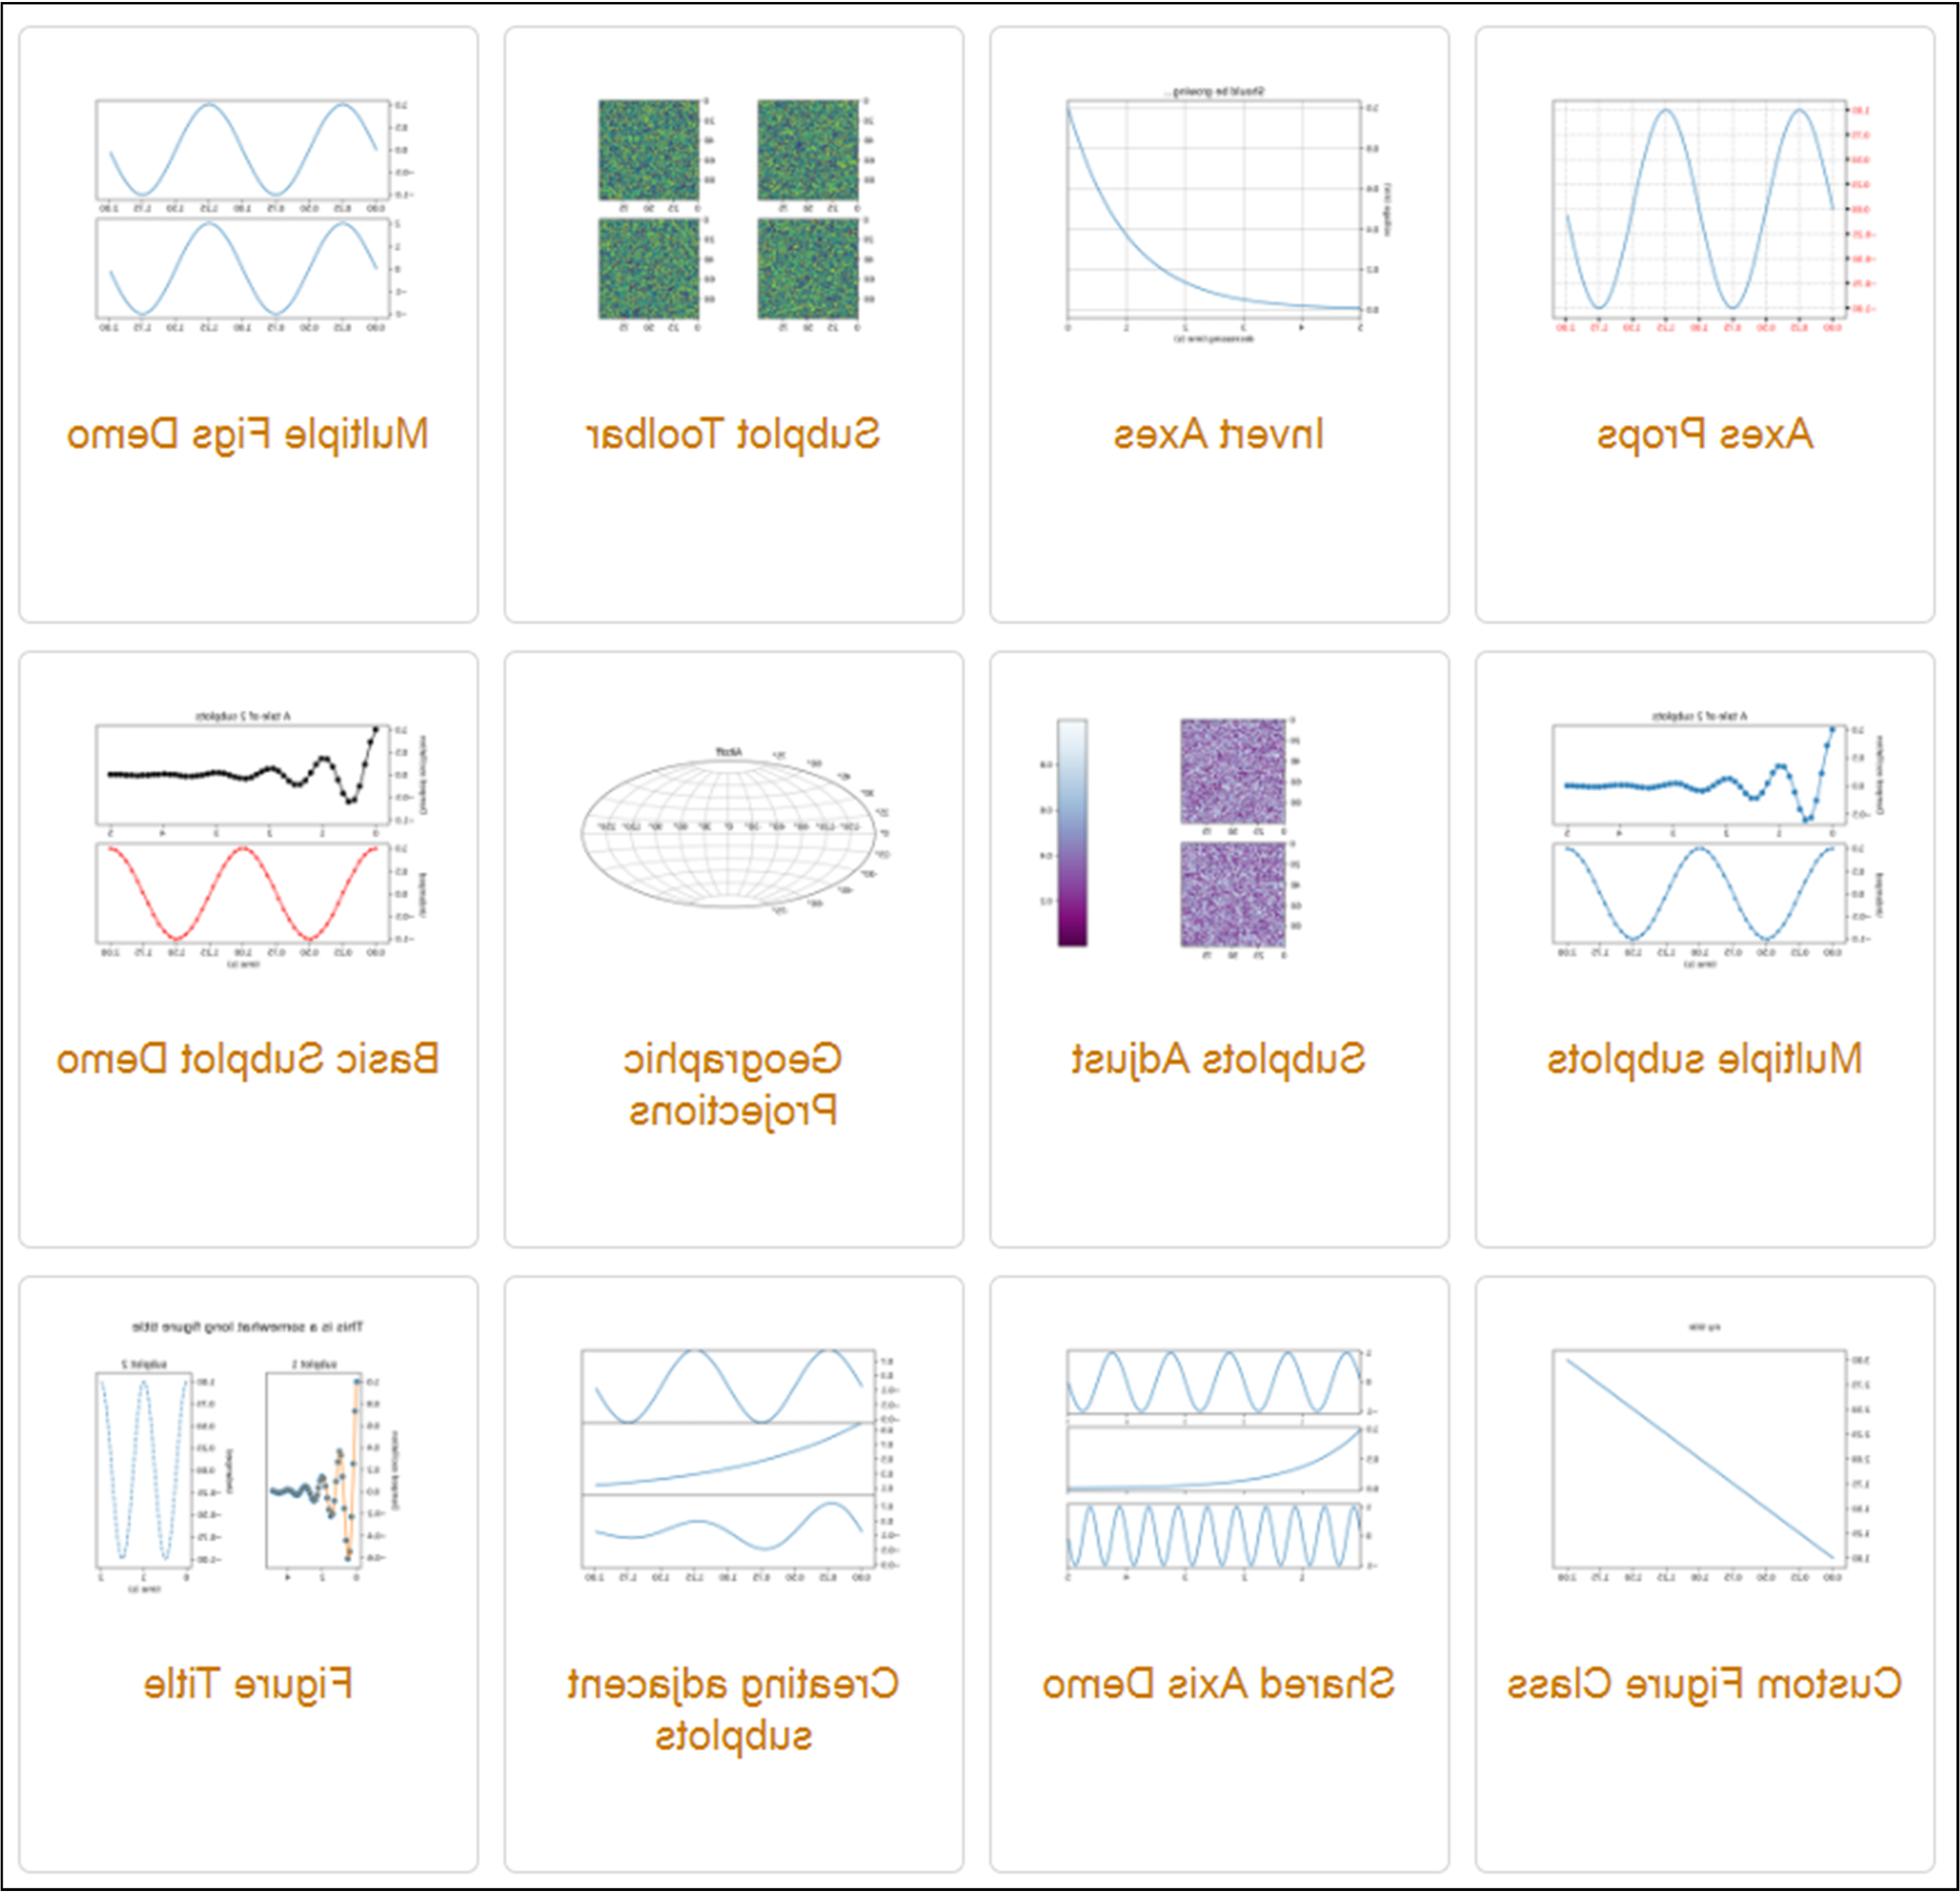
</td>
<td>
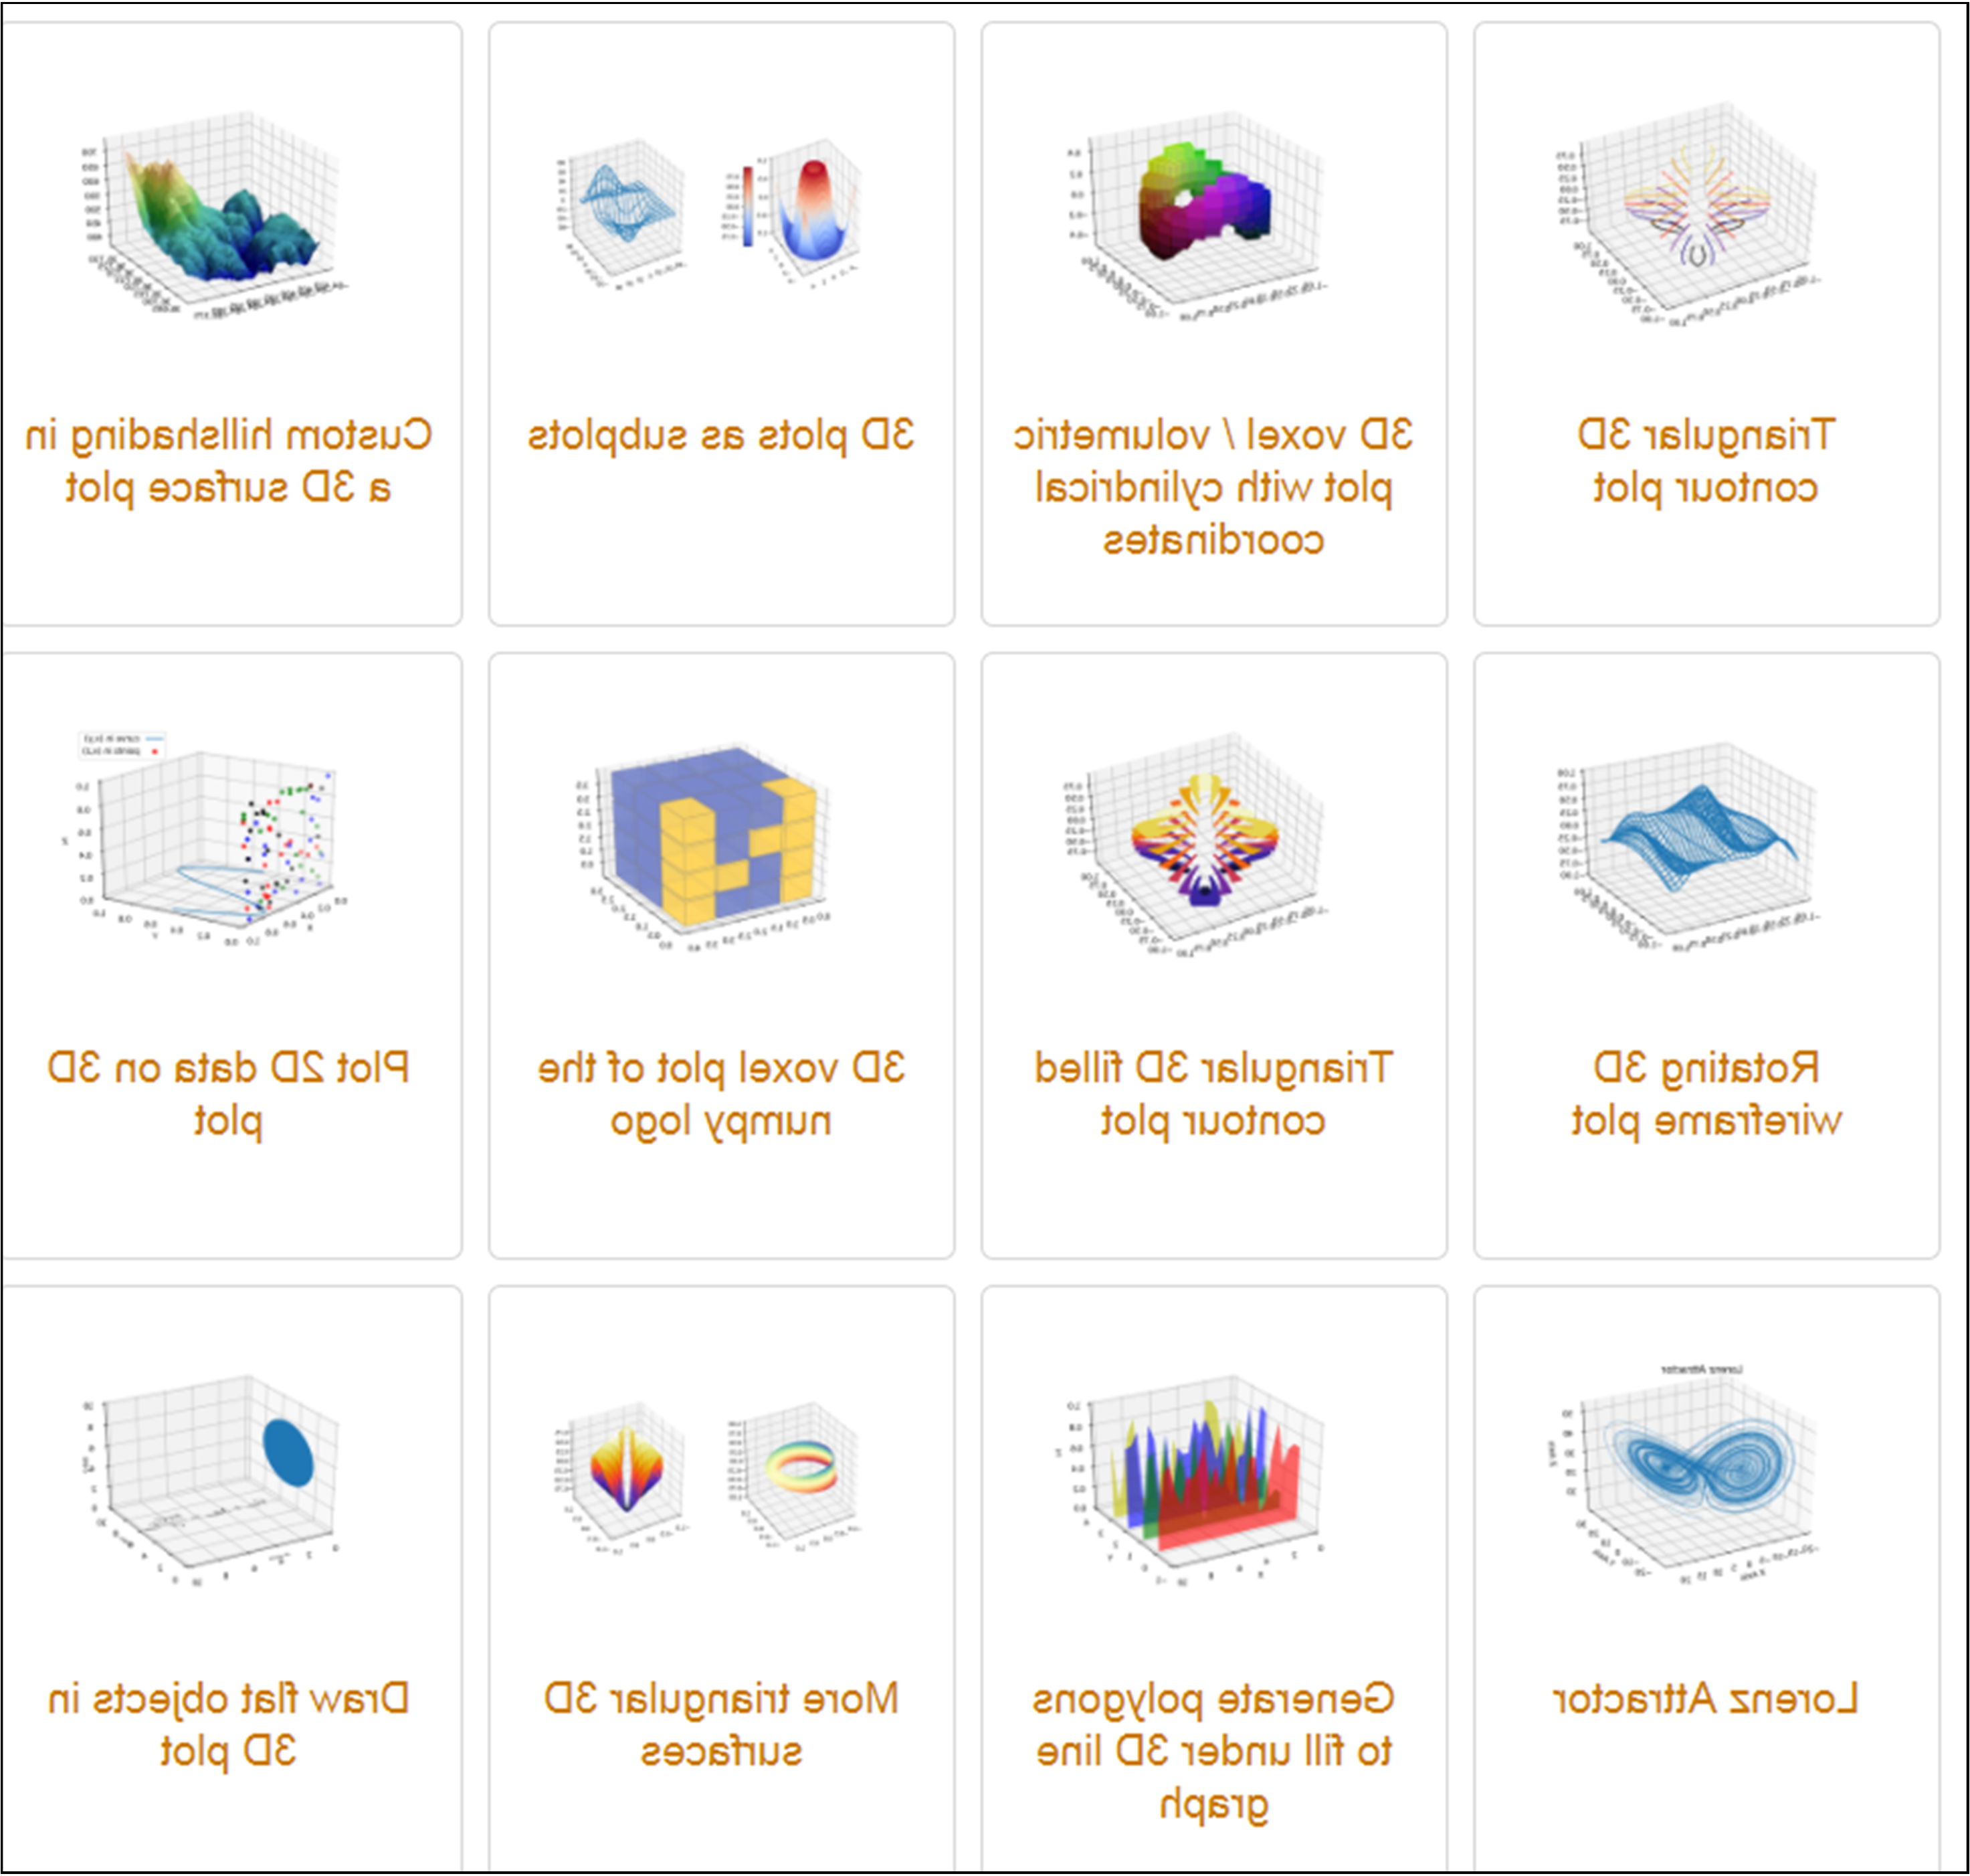
</td>
</tr>
</table>

+ Show Chinese characters.

      from matplotlib.font_manager import FontProperties
      import os 
      font = FontProperties(fname=os.environ['WINDIR']+'\\Fonts\\mingliu.ttc', size=20)
      fig.subtitle(title, fontproperties=font) 

+ Save the current figure.

      import matplotlib.pyplot as plt
      plt.savefig(filename) # .png, .pdf, …
  
#### Example 1:  A figure with Chinese captions and titles
<img src="attachment:figure.png" width="600">   

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os 

font = FontProperties(fname=os.environ['WINDIR']+'\\Fonts\\kaiu.ttf', size=16)
# for display Chinese characters

data = np.array([[24, 71, 36, 46, 28, 60, 64, 99, 57,  7],
 [82, 74, 60, 77,  3, 35, 98, 97, 59, 44],
 [79, 27, 16, 80, 17, 38, 74, 87, 18, 93],
 [30, 84, 60, 60, 31, 23, 47, 90, 46, 75]])

label= ['青龍', '百虎', '朱雀', '玄武']

plt.figure(figsize=(10,5))
for i in range(4):
    plt.plot(np.arange(data.shape[1]),data[i,:],label=label[i])
plt.xticks(np.arange(data.shape[1]),['甲子','乙丑','丙寅','丁卯','戊辰','己巳','庚午','辛未','壬申','癸酉'],fontproperties=font)    
plt.legend(loc='lower right',prop=font)
plt.title('四聖獸戰力分析',fontproperties=font)
plt.xlabel('年',fontproperties=font)
plt.ylabel('戰力指數',fontproperties=font)
plt.savefig('四聖獸戰力分析.png',dpi=600)
plt.show()

<Figure size 1000x500 with 1 Axes>

#### Example 2: Least-Squares Problems
+ use np.linalg.lstsq to find a regression linear by solving the least-squares problem (A): $\text{arg}\min_{a,b}\sum_{i=1}^{n}(ax_{i}+b-y_{i})^{2}$

+ use np.polyfit to find the third-degree polynomial minimizing the least-squares problem (B): $\text{arg}\min_{a,b,c,d}\sum_{i=1}^{n}(ax_{i}^{3}+bx_{i}^{2}+cx_{i}+d-y_{i})^{2}$

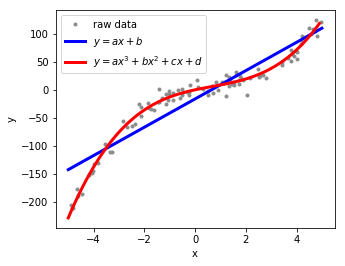

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')      
    
plt.figure(figsize=(5,4))
# generate data
x = (np.random.random((1,100))-0.5)*10
y = x**3-2*x**2+10*x+np.random.randn(1,100)*10
plt.plot(x.ravel(),y.ravel(),'.',color='#8c8c8c',label='raw data')

# use np.linalg.lstsq to find a regression linear by solving the least-squares problem (A)
lsq_sol = np.linalg.lstsq(np.hstack([x.reshape(-1,1),np.ones((x.size,1))]),y.reshape(-1,1))
plt.plot(np.arange(-5,5.1,10),lsq_sol[0].ravel()[0]*np.arange(-5,5.1,10)+lsq_sol[0].ravel()[1],'b-',linewidth=3,label='$y=ax+b$')

# use np.polyfit to find the third-degree polynomial minimizing the least-squares problem (B)
p3 = np.polyfit(x.ravel(),y.ravel(),3)


plt.plot(np.arange(-5,5,0.1),np.polyval(p3,np.arange(-5,5,0.1)),'r-',linewidth=3,label='$y=ax^3+bx^2+cx+d$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#### Example 3: Fast Fourier Transform
<img src="attachment:fftsubfigure.png" width="600">  
 

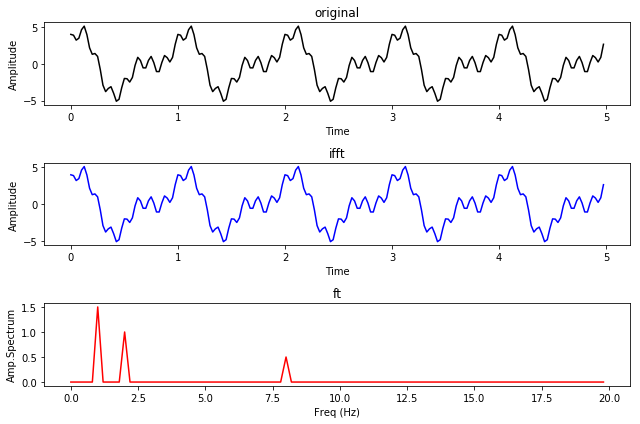

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def show(signal, ft, sampling_period=5):
    n = len(signal)
    interval = sampling_period / n
    plt.figure(figsize=(9,6))
    plt.subplot(3,1,1)
    plt.plot(np.arange(0,sampling_period,interval),signal,'black')
    plt.xlabel('Time'); plt.ylabel('Amplitude'); plt.title('original')
    plt.subplot(3,1,2)
    plt.plot(np.arange(0,sampling_period,interval),np.fft.ifft(ft).real,'blue')
    plt.xlabel('Time'); plt.ylabel('Amplitude'); plt.title('ifft')
    plt.subplot(3,1,3)
    frequency = np.arange(n//2)/sampling_period
    nfft = abs(ft[range(int(n//2))]/n)
    plt.plot(frequency,nfft,'red')
    plt.xlabel('Freq (Hz)'); plt.ylabel('Amp.Spectrum'); plt.title('ft')
    plt.tight_layout()
    plt.show()

# 8Hz, 2Hz, 1Hz    
signal = np.cos(np.arange(0,200)/2.5*np.pi)+2*np.sin(np.arange(0,200)/10*np.pi)+3*np.cos(np.arange(0,200)/20*np.pi)
ft     = np.fft.fft(signal)
show(signal,ft)
    

#### Example 4: Show images

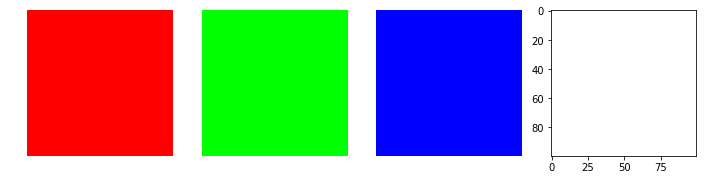

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
r = np.zeros((100,100,3),dtype=np.ubyte)
r[:,:,0] = 255
g = np.zeros((100,100,3),dtype=np.ubyte)
g[:,:,1] = 255
b = np.zeros((100,100,3),dtype=np.ubyte)
b[:,:,2] = 255

plt.subplot(1,4,1)
plt.imshow(r)
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(g)
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(b)
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(b[:,:,2],cmap='gray',vmin=0,vmax=255)
#plt.matshow(b[:,:,2] )
plt.axis('on')

plt.show()